In [1]:
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from mlxtend.plotting import plot_decision_regions
import missingno as msno
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


In [2]:
diabetes_df=pd.read_csv(r'D:\Downloads\test1\data_science\diabetes.csv')

In [3]:
diabetes_df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

EDA(Exploratory data analysis)

In [4]:
#total no. of columns in the dataset
diabetes_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
#info about the dataset
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
#to know more about the dataset
diabetes_df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [7]:
#to know more about the dataset with transpose
diabetes_df.describe().T

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

In [87]:
diabetes_df.isnull() #checking if there are some null values

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
0          False    False          False          False    False  False   
1          False    False          False          False    False  False   
2          False    False          False          False    False  False   
3          False    False          False          False    False  False   
4          False    False          False          False    False  False   
..           ...      ...            ...            ...      ...    ...   
763        False    False          False          False    False  False   
764        False    False          False          False    False  False   
765        False    False          False          False    False  False   
766        False    False          False          False    False  False   
767        False    False          False          False    False  False   

     DiabetesPedigreeFunction    Age  Outcome  
0                       False  False    False  
1                       False  False    False  
2                       False  False    False  
3                       False  False    False  
4                       False  False    False  
..                        ...    ...      ...  
763                     False  False    False  
764                     False  False    False  
765                     False  False    False  
766                     False  False    False  
767                     False  False    False  

[768 rows x 9 columns]

In [8]:
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
diabetes_df_copy=diabetes_df.copy(deep=True)
diabetes_df_copy[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']].replace(0,np.NaN)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6.0    148.0           72.0           35.0      NaN  33.6   
1            1.0     85.0           66.0           29.0      NaN  26.6   
2            8.0    183.0           64.0            NaN      NaN  23.3   
3            1.0     89.0           66.0           23.0     94.0  28.1   
4            NaN    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763         10.0    101.0           76.0           48.0    180.0  32.9   
764          2.0    122.0           70.0           27.0      NaN  36.8   
765          5.0    121.0           72.0           23.0    112.0  26.2   
766          1.0    126.0           60.0            NaN      NaN  30.1   
767          1.0     93.0           70.0           31.0      NaN  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50      1.0  
1                       0.351   31      NaN  
2                       0.672   32      1.0  
3                       0.167   21      NaN  
4                       2.288   33      1.0  
..                        ...  ...      ...  
763                     0.171   63      NaN  
764                     0.340   27      NaN  
765                     0.245   30      NaN  
766                     0.349   47      1.0  
767                     0.315   23      NaN  

[768 rows x 9 columns]

In [10]:
diabetes_df_copy.isnull().sum() #counting nans


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

DATA VISUALIZATION 

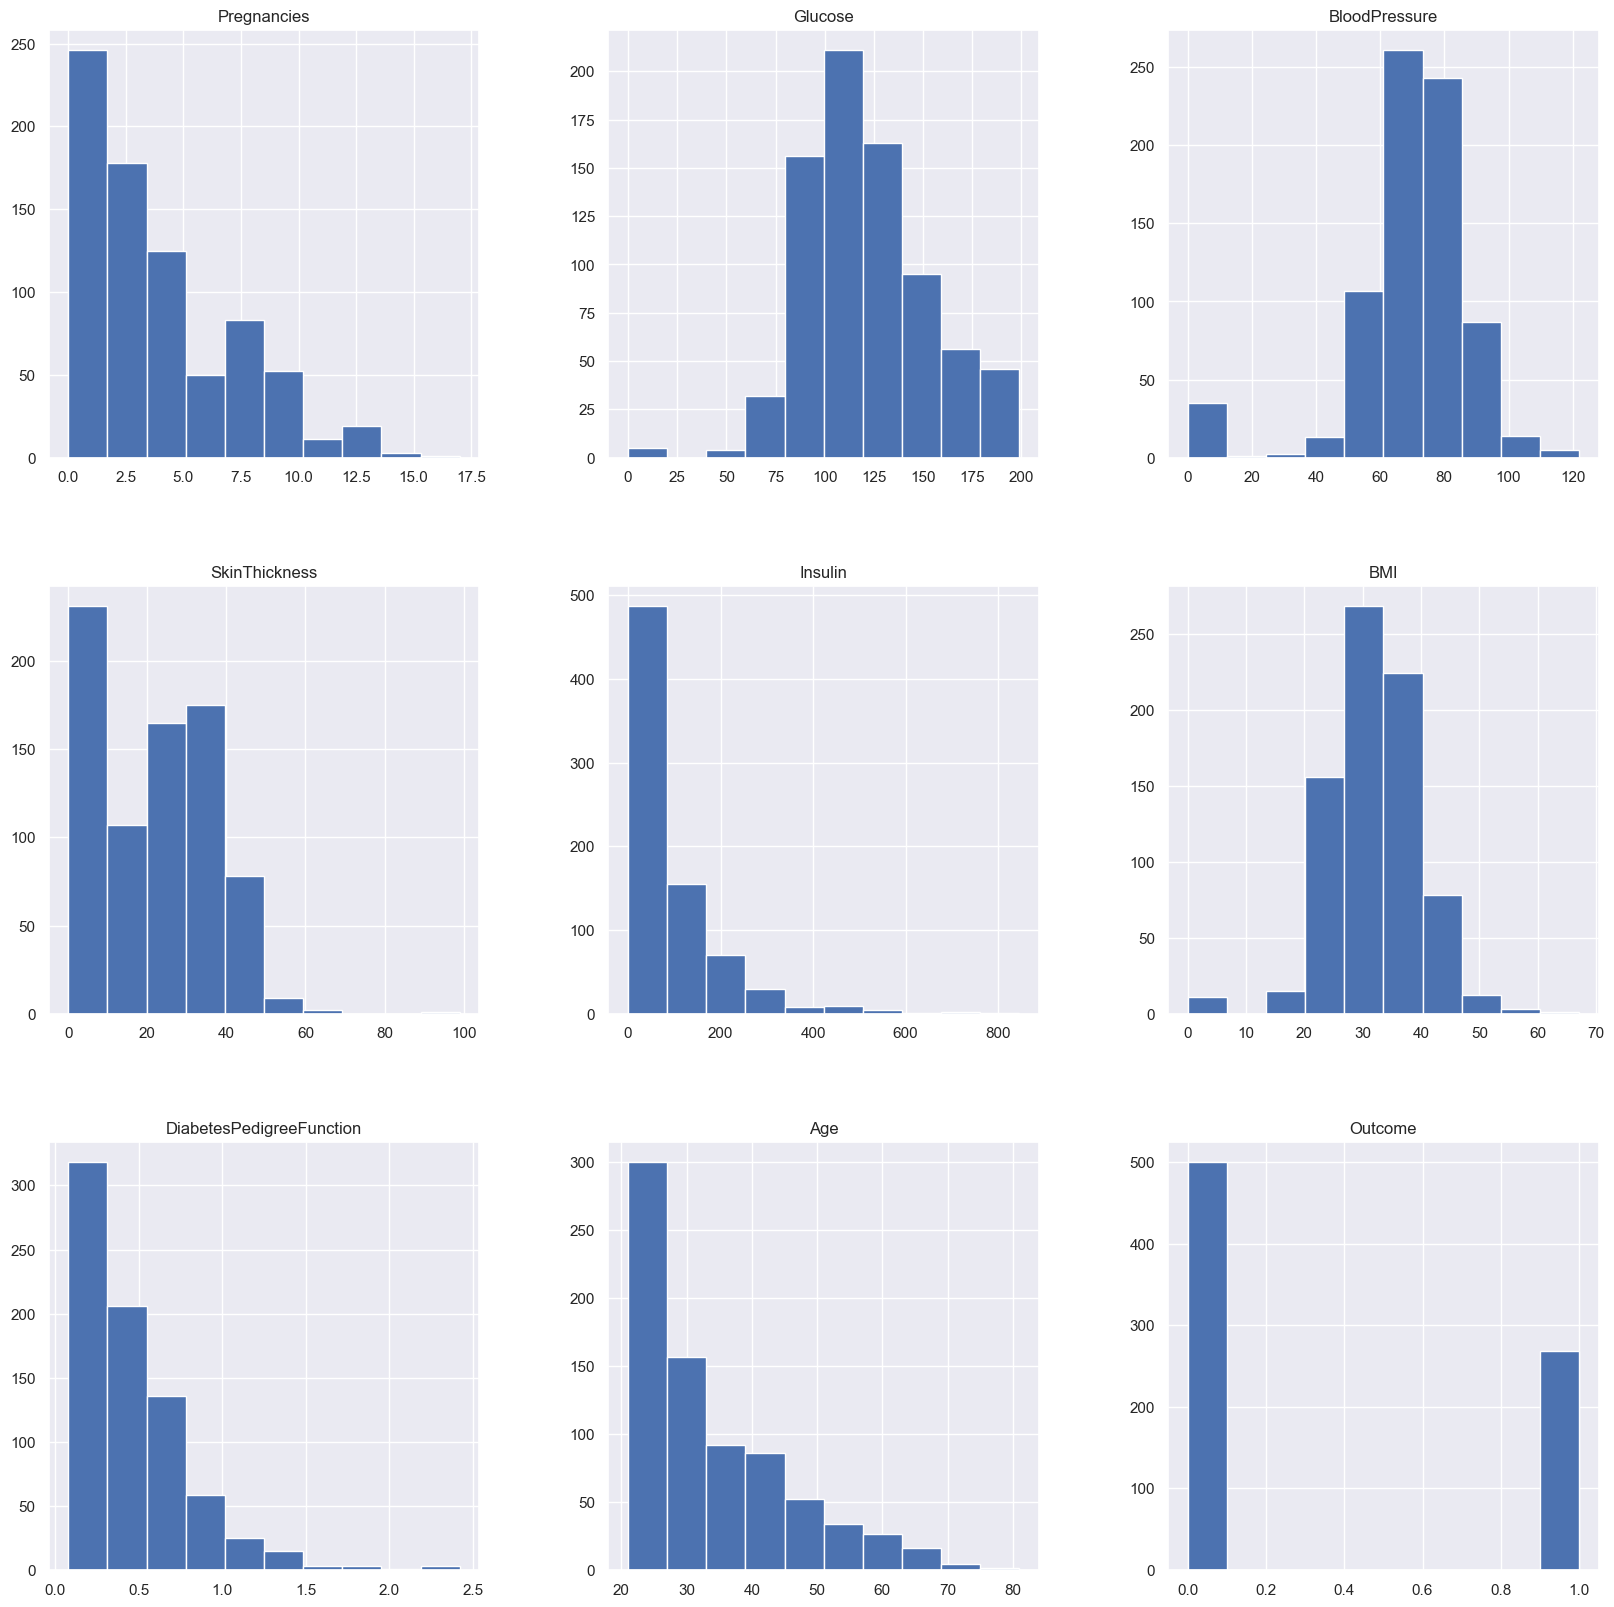

In [11]:
#plotting the data distribution plots
p=diabetes_df.hist(figsize=(20,20))

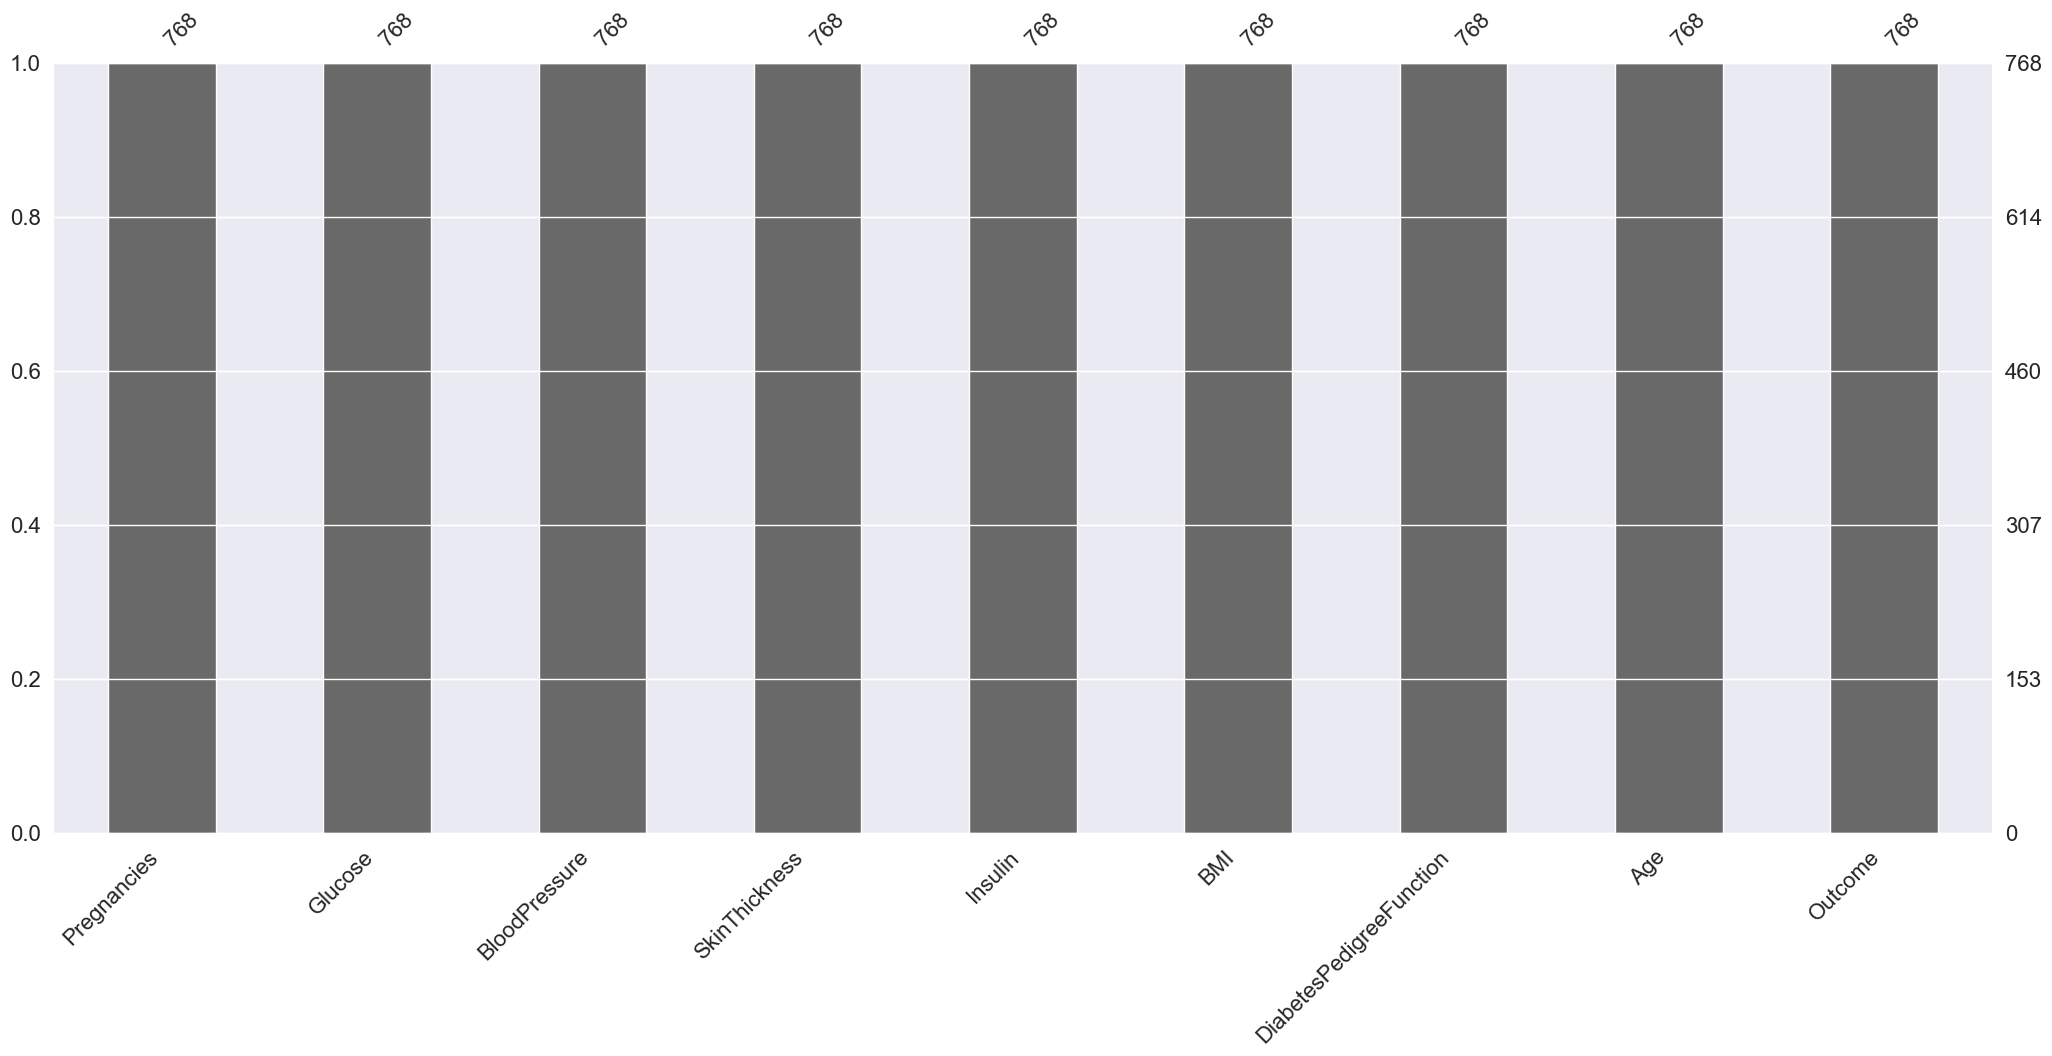

In [12]:
#plotting null count analysis plot
p=msno.bar(diabetes_df)

Outcome
0    500
1    268
Name: count, dtype: int64


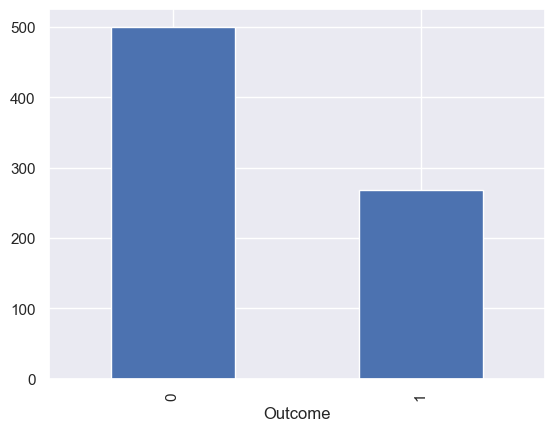

In [13]:
#checking the balance of the data by plotting the count of outcomes by their values
color_wheel={1:'#0392cf',2:'#7bc043'}
colors=diabetes_df["Outcome"].map(lambda x:color_wheel.get(x+1)) #mapping with the color wheel
print(diabetes_df.Outcome.value_counts())#counts of unique values
p=diabetes_df.Outcome.value_counts().plot(kind="bar")

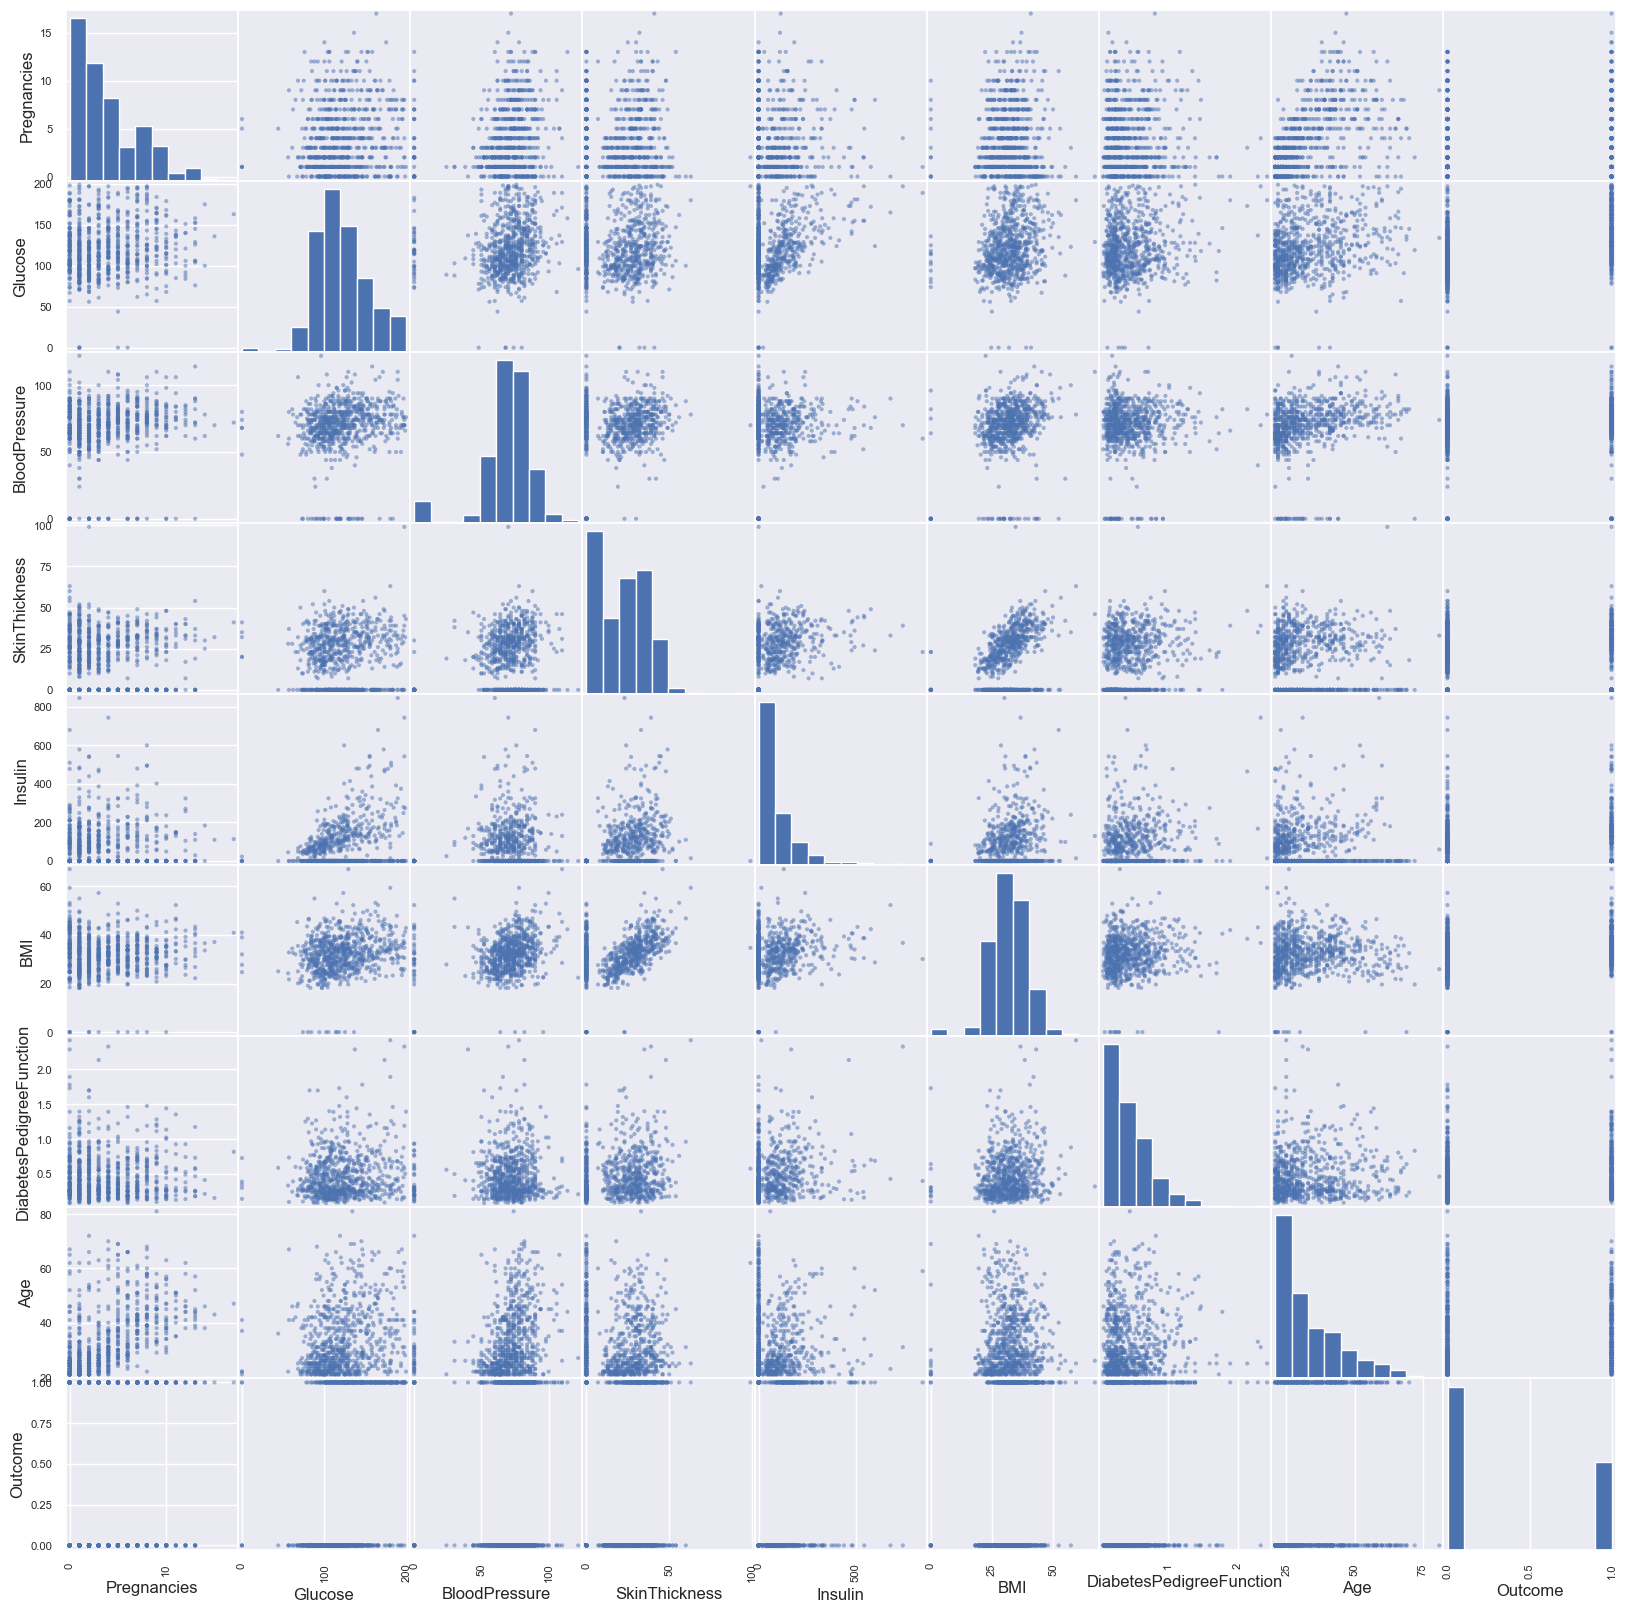

In [14]:
#plotting scatter matrix of uncleaned data
p=scatter_matrix(diabetes_df,figsize=(20,20))

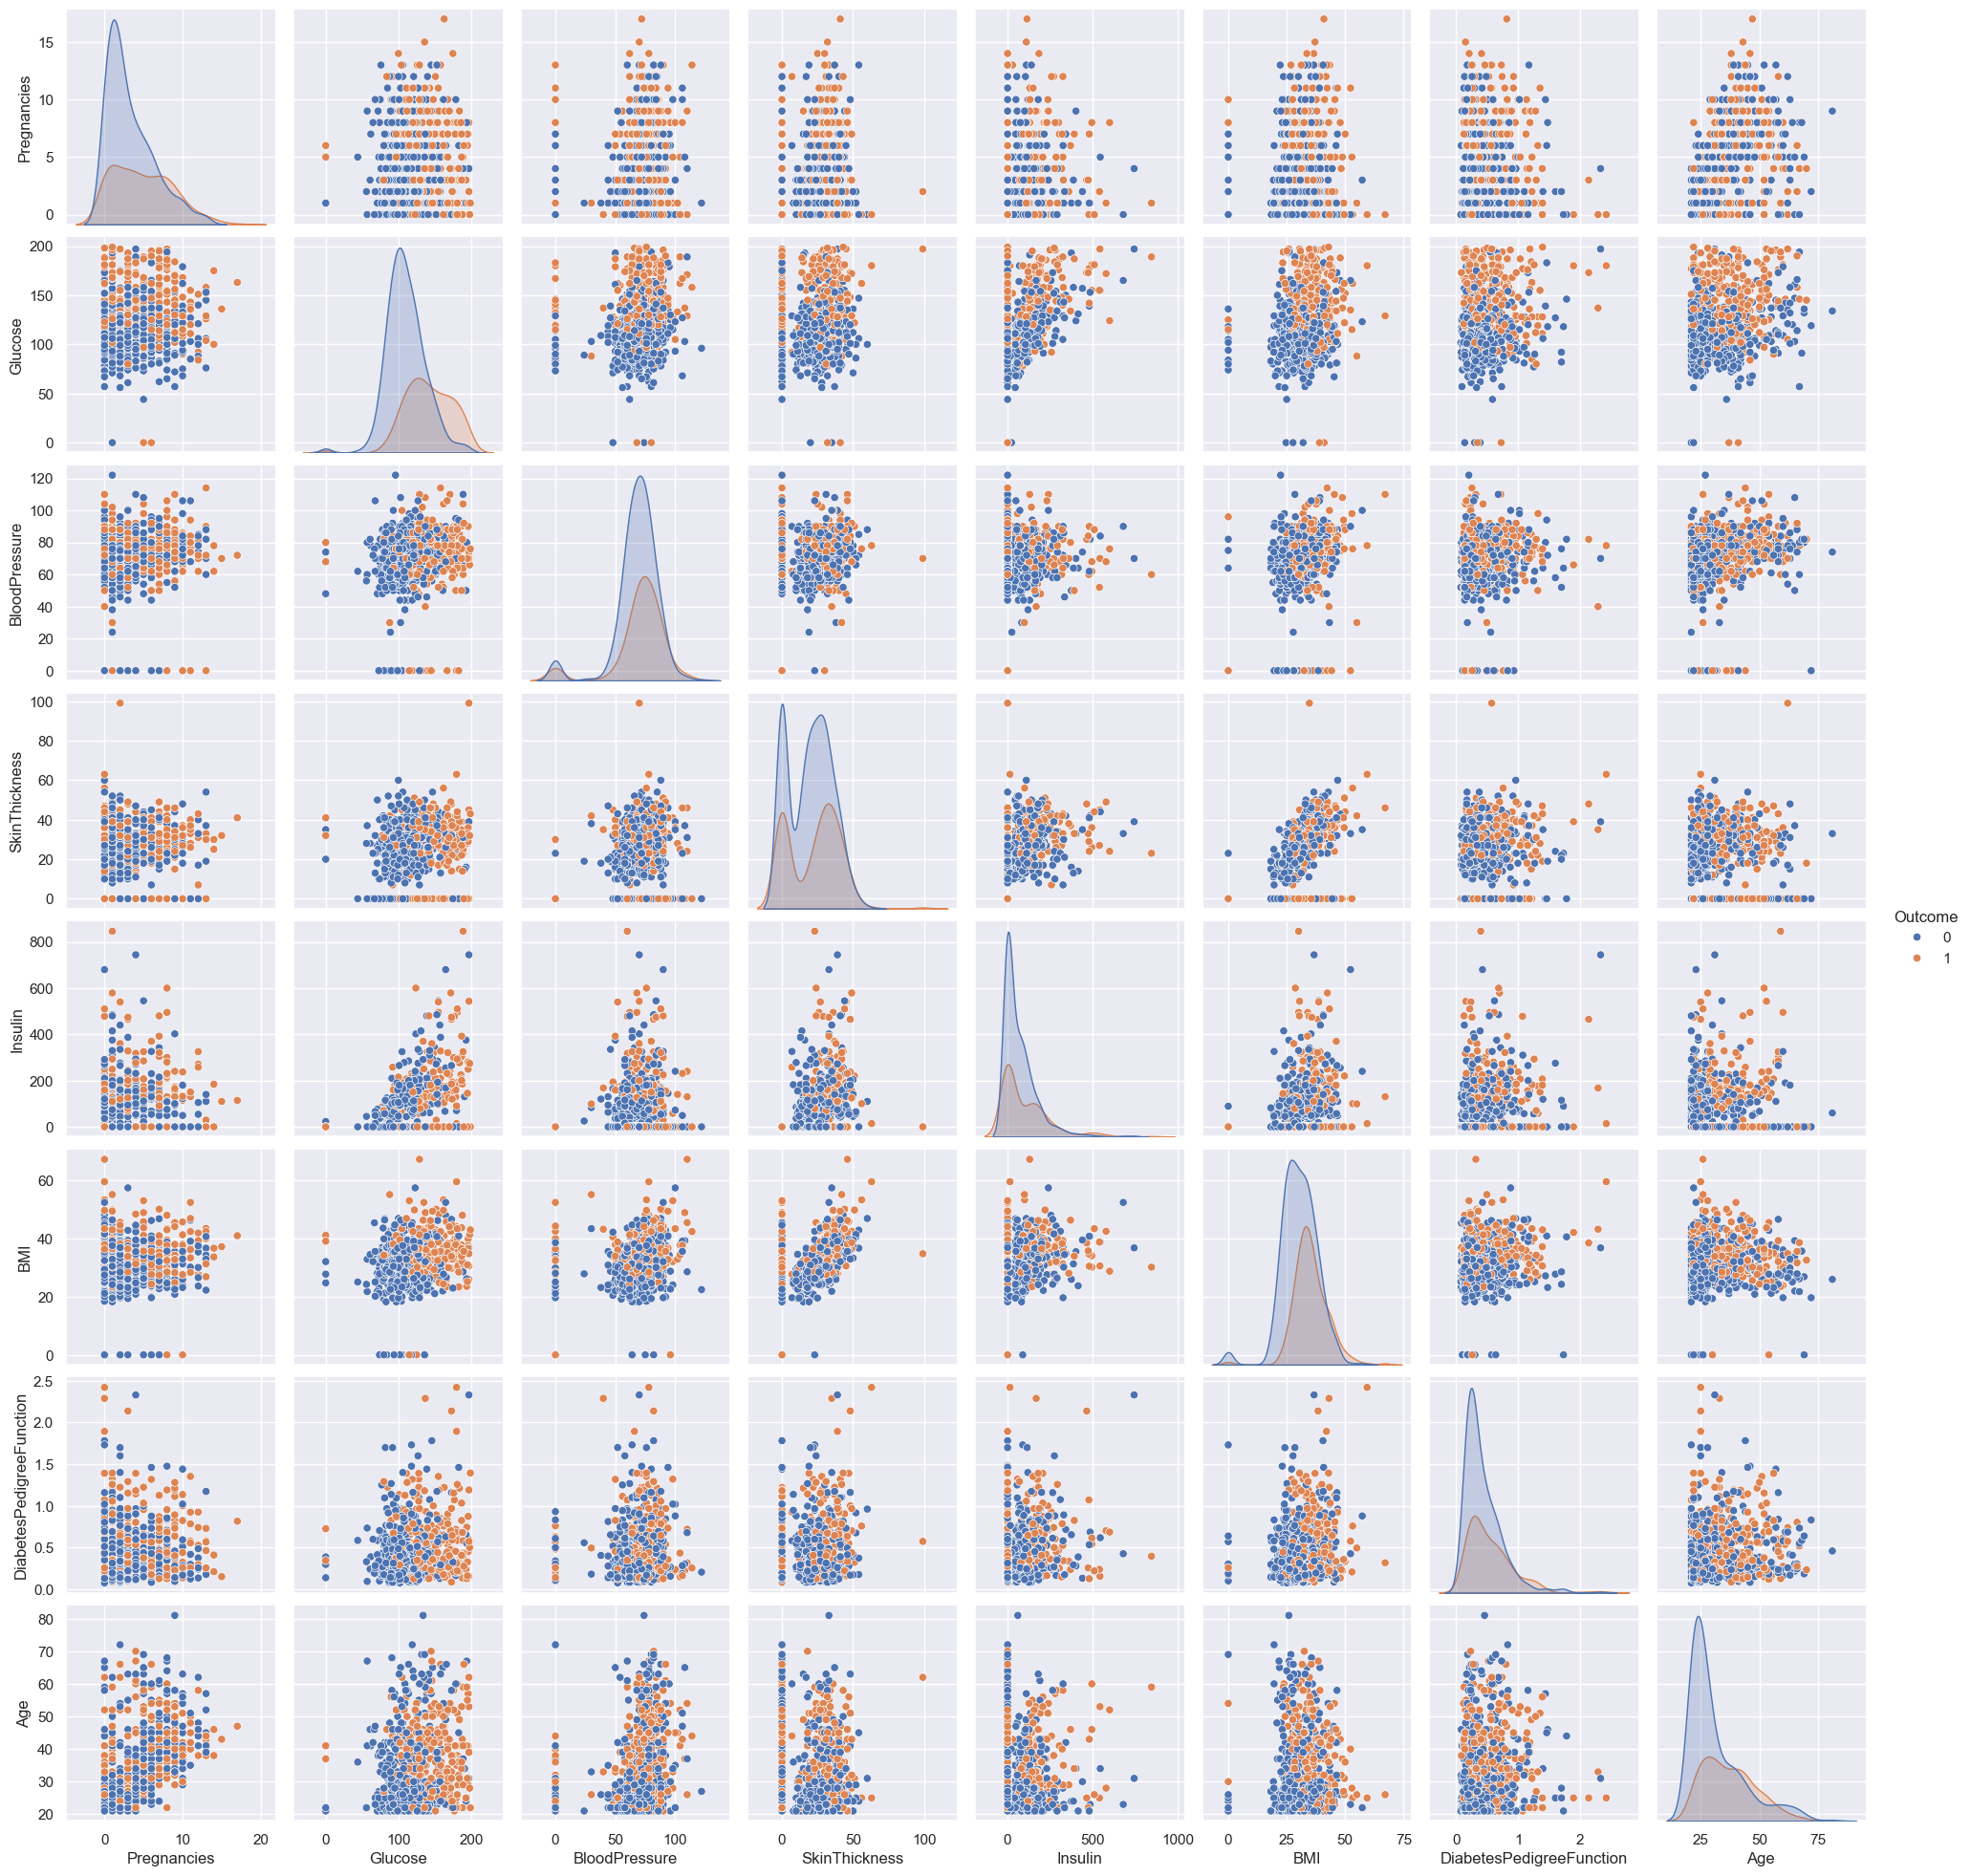

In [16]:
#plotting the pair plots for the data
p=sns.pairplot(diabetes_df_copy,hue='Outcome') #hue=grouping variable that will provide different colors

Correlation b/w all the features

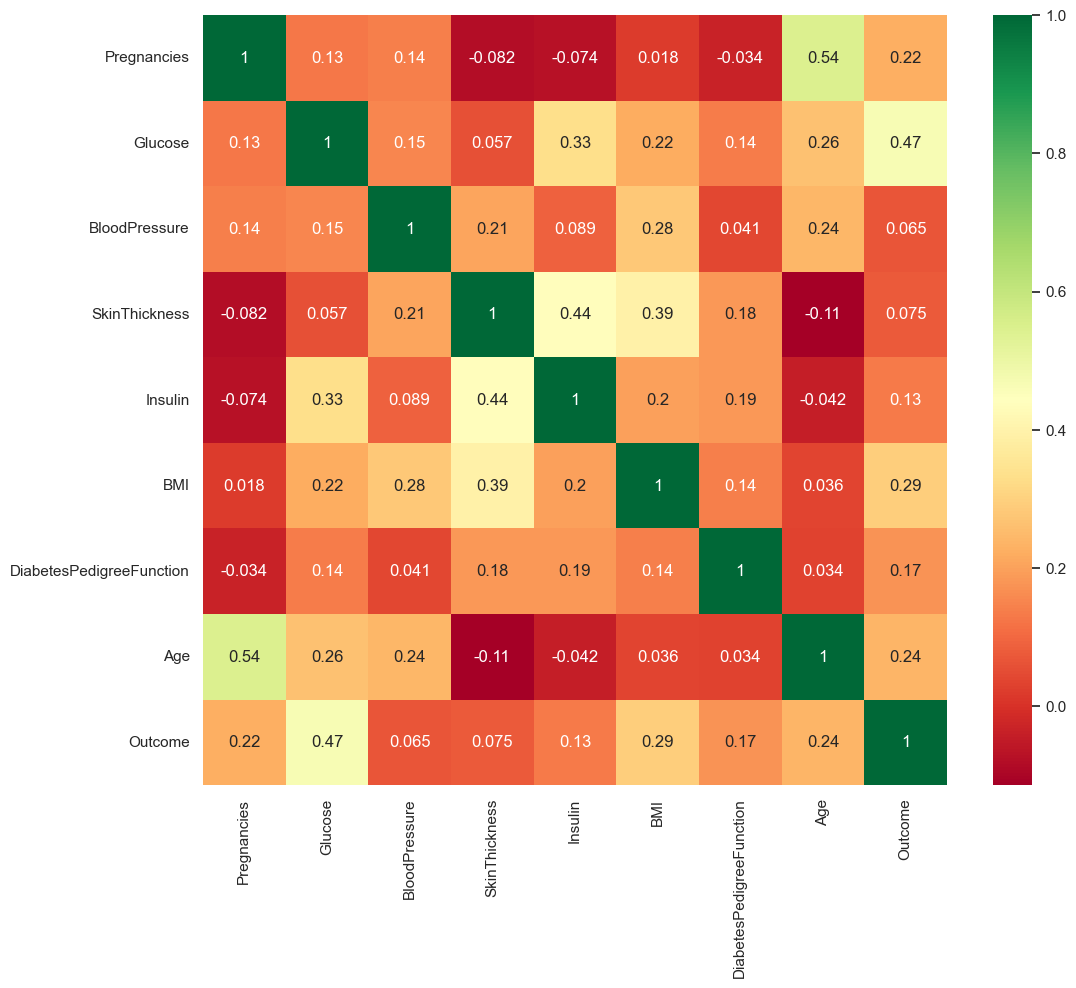

In [17]:
#correlation b/w all the feature before cleaning
plt.figure(figsize=(12,10))
p=sns.heatmap(diabetes_df_copy.corr(),annot=True,cmap='RdYlGn')

scaling the data

In [18]:
diabetes_df_copy.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [22]:
sc_X=StandardScaler()
X=pd.DataFrame(sc_X.fit_transform(diabetes_df_copy.drop(['Outcome'],axis=1),),columns=[	'Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction',	'Age'])
X.head()

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.639947  0.848324       0.149641       0.907270 -0.692891  0.204013   
1    -0.844885 -1.123396      -0.160546       0.530902 -0.692891 -0.684422   
2     1.233880  1.943724      -0.263941      -1.288212 -0.692891 -1.103255   
3    -0.844885 -0.998208      -0.160546       0.154533  0.123302 -0.494043   
4    -1.141852  0.504055      -1.504687       0.907270  0.765836  1.409746   

   DiabetesPedigreeFunction       Age  
0                  0.468492  1.425995  
1                 -0.365061 -0.190672  
2                  0.604397 -0.105584  
3                 -0.920763 -1.041549  
4                  5.484909 -0.020496

In [19]:
y=diabetes_df_copy.Outcome

In [23]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

Splitting data into train and test

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=1/3,random_state=42,stratify=y)

Model building

K-Nearest Neighbours

In [25]:
test_scores=[]
train_scores=[]

for i in range(1,15): #kvalues are from 1 to 15
    knn=KNeighborsClassifier(i) #instance
    knn.fit(X_train,y_train) #select the best neighvor

    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [26]:
train_scores

[1.0,
 0.837890625,
 0.857421875,
 0.8046875,
 0.82421875,
 0.791015625,
 0.80859375,
 0.791015625,
 0.802734375,
 0.77734375,
 0.783203125,
 0.783203125,
 0.7890625,
 0.779296875]

In [27]:
test_scores

[0.71875,
 0.6953125,
 0.6875,
 0.71875,
 0.73046875,
 0.734375,
 0.76171875,
 0.75390625,
 0.765625,
 0.765625,
 0.76953125,
 0.75390625,
 0.7578125,
 0.734375]

In [28]:
max_train_score=max(train_scores)
train_scores_ind=[i for i, v in enumerate(train_scores) if v==max_train_score]
print('Max train score {} % and k={}'.format(max_train_score*100,list(map(lambda x:x+1,train_scores_ind)))

SyntaxError: incomplete input (2730467038.py, line 3)

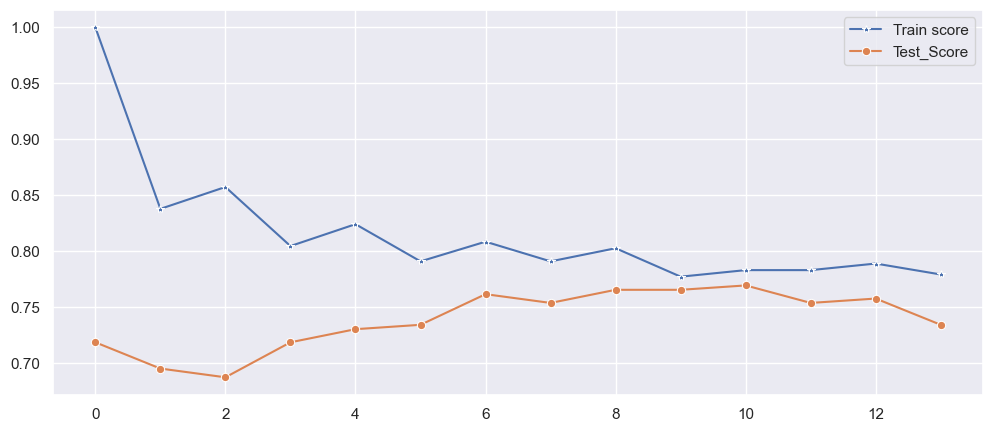

In [29]:
plt.figure(figsize=(12,5))
p=sns.lineplot(train_scores,marker='*',label='Train score') #blue
p=sns.lineplot(test_scores,marker='o',label='Test_Score') #red

In [30]:
knn=KNeighborsClassifier(11)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.76953125

Text(0.5, 20.049999999999997, 'Predicted label')

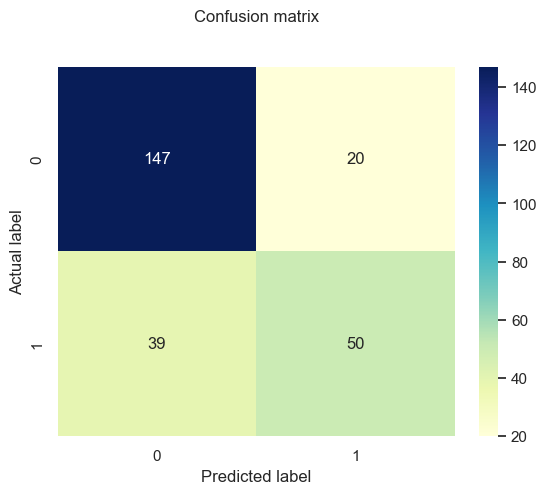

In [31]:
#confusion matrix
y_pred=knn.predict(X_test)
cnf_matrix=metrics.confusion_matrix(y_test,y_pred)
p=sns.heatmap(pd.DataFrame(cnf_matrix),annot=True,cmap='YlGnBu',fmt='g')
plt.title('Confusion matrix',y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [32]:
#classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       167
           1       0.71      0.56      0.63        89

    accuracy                           0.77       256
   macro avg       0.75      0.72      0.73       256
weighted avg       0.76      0.77      0.76       256



In [33]:
# Logistic Regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)



LogisticRegression()

In [34]:
# Predictions
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

In [35]:
# Evaluation
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix:\n {confusion_matrix(y_test, y_pred)}")
print(f"Classification Report:\n {classification_report(y_test, y_pred)}")
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_prob)}")

Accuracy: 0.73828125
Confusion Matrix:
 [[141  26]
 [ 41  48]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.84      0.81       167
           1       0.65      0.54      0.59        89

    accuracy                           0.74       256
   macro avg       0.71      0.69      0.70       256
weighted avg       0.73      0.74      0.73       256

ROC-AUC Score: 0.8285675839332571


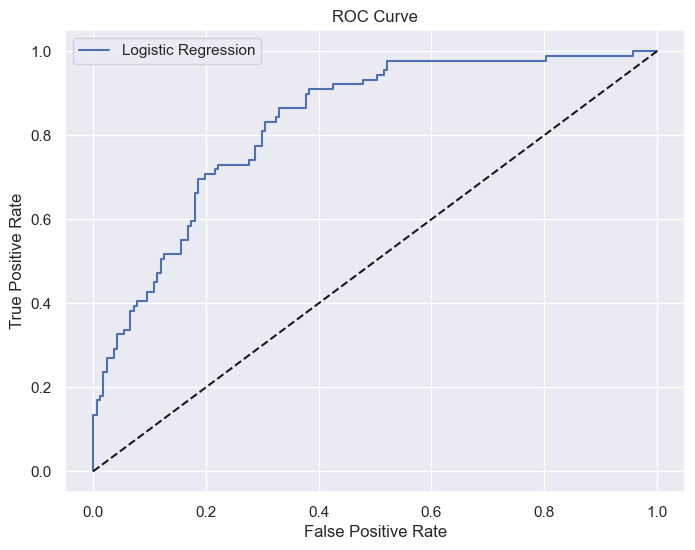

In [36]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [42]:
import pickle
pickle.dump(model,open('log_diabetes_model.pkl','wb'))